# Exploratory Data Analysis

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from pathlib import Path
from sklearn.preprocessing import LabelEncoder

In [26]:
# Import training dataset
dataset = Path('../dataset')
df = pd.read_csv(dataset/"accidents_train.csv")
df.head()

,Num,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,...,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity
0,1,17:02:00,Monday,18-30,Male,Above high school,Employee,1-2yr,Automobile,Owner,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Moving Backward,Slight Injury
1,2,17:02:00,Monday,31-50,Male,Junior high school,Employee,Above 10yr,Public (> 45 seats),Owner,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury
2,3,17:02:00,Monday,18-30,Male,Junior high school,Employee,1-2yr,Lorry (41?100Q),Owner,...,Going straight,Driver or rider,Male,31-50,3,Driver,NaN,Not a Pedestrian,Changing lane to the left,Serious Injury
3,4,1:06:00,Sunday,18-30,Male,Junior high school,Employee,5-10yr,Public (> 45 seats),Governmental,...,Going straight,Pedestrian,Female,18-30,3,Driver,Normal,Not a Pedestrian,Changing lane to the right,Slight Injury
4,5,1:06:00,Sunday,18-30,Male,Junior high school,Employee,2-5yr,NaN,Owner,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury


In [27]:
df.columns

Index(['Num', 'Time', 'Day_of_week', 'Age_band_of_driver', 'Sex_of_driver',
       'Educational_level', 'Vehicle_driver_relation', 'Driving_experience',
       'Type_of_vehicle', 'Owner_of_vehicle', 'Service_year_of_vehicle',
       'Defect_of_vehicle', 'Area_accident_occured', 'Lanes_or_Medians',
       'Road_allignment', 'Types_of_Junction', 'Road_surface_type',
       'Road_surface_conditions', 'Light_conditions', 'Weather_conditions',
       'Type_of_collision', 'Number_of_vehicles_involved',
       'Number_of_casualties', 'Vehicle_movement', 'Casualty_class',
       'Sex_of_casualty', 'Age_band_of_casualty', 'Casualty_severity',
       'Work_of_casuality', 'Fitness_of_casuality', 'Pedestrian_movement',
       'Cause_of_accident', 'Accident_severity'],
      dtype='object')

In [28]:
df.shape

(8210, 33)

Original dataset has 8210 rows  and 33 features. 
The target feature is "Accident_severity". 

In [29]:
target = 'Accident_severity'
my_list = df.columns.tolist()
set3 = my_list[21:33]
print(len(set3), set3)

12 ['Number_of_vehicles_involved', 'Number_of_casualties', 'Vehicle_movement', 'Casualty_class', 'Sex_of_casualty', 'Age_band_of_casualty', 'Casualty_severity', 'Work_of_casuality', 'Fitness_of_casuality', 'Pedestrian_movement', 'Cause_of_accident', 'Accident_severity']


## Dataset split into 3 sets of features for EDA by team

In [30]:
features = my_list[21:33]
df1 = df[features]

df1.head()

,Number_of_vehicles_involved,Number_of_casualties,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity
0,2,2,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Moving Backward,Slight Injury
1,2,2,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury
2,2,2,Going straight,Driver or rider,Male,31-50,3,Driver,NaN,Not a Pedestrian,Changing lane to the left,Serious Injury
3,2,2,Going straight,Pedestrian,Female,18-30,3,Driver,Normal,Not a Pedestrian,Changing lane to the right,Slight Injury
4,2,2,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury


In [31]:
# Import custom functions
%run ../custom/jc-functions.ipynb

## Data Understanding

In [32]:
# Set continuous and categorical features 
cont_feat = ['Number_of_vehicles_involved', 'Number_of_casualties']
cat_feat = ['Vehicle_movement', 'Casualty_class', 'Sex_of_casualty', 'Age_band_of_casualty', 'Casualty_severity', 'Work_of_casuality', 'Fitness_of_casuality', 'Pedestrian_movement', 'Cause_of_accident', 'Accident_severity']

#### Unique values for continuous features:

In [33]:
for feat in cont_feat:
    list = df1[feat].unique()
    print(f"{feat}: There are {len(list)} unique items in this list. \n {list}")

Number_of_vehicles_involved: There are 6 unique items in this list. 
 [2 1 3 6 4 7]
Number_of_casualties: There are 8 unique items in this list. 
 [2 1 3 4 6 5 8 7]


#### Unique values for categorical features: 

In [34]:
for feat in cat_feat:
    list = df1[feat].unique()
    print(f"{feat}: There are {len(list)} unique items in this list. \n {list}")

Vehicle_movement: There are 14 unique items in this list. 
 ['Going straight' 'U-Turn' 'Moving Backward' 'Turnover' 'Waiting to go'
 'Getting off' 'Reversing' 'Unknown' 'Parked' 'Stopping' 'Overtaking'
 'Other' 'Entering a junction' nan]
Casualty_class: There are 4 unique items in this list. 
 ['na' 'Driver or rider' 'Pedestrian' 'Passenger']
Sex_of_casualty: There are 3 unique items in this list. 
 ['na' 'Male' 'Female']
Age_band_of_casualty: There are 6 unique items in this list. 
 ['na' '31-50' '18-30' 'Under 18' 'Over 51' '5']
Casualty_severity: There are 4 unique items in this list. 
 ['na' '3' '2' '1']
Work_of_casuality: There are 8 unique items in this list. 
 [nan 'Driver' 'Other' 'Unemployed' 'Employee' 'Self-employed' 'Student'
 'Unknown']
Fitness_of_casuality: There are 6 unique items in this list. 
 [nan 'Normal' 'Deaf' 'Other' 'Blind' 'NormalNormal']
Pedestrian_movement: There are 9 unique items in this list. 
 ['Not a Pedestrian' "Crossing from driver's nearside"
 'Crossi

In [35]:
# Create column for Accident_severity_enc
severity_mapping = {
    'Slight Injury': 0, 
    'Serious Injury': 1, 
    'Fatality': 2
}

df1['Accident_severity_enc'] = df1['Accident_severity'].map(severity_mapping)

df1.head()

C:\Users\Jun C\AppData\Local\Temp\ipykernel_24432\2933847221.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Accident_severity_enc'] = df1['Accident_severity'].map(severity_mapping)


,Number_of_vehicles_involved,Number_of_casualties,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity,Accident_severity_enc
0,2,2,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Moving Backward,Slight Injury,0.0
1,2,2,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury,0.0
2,2,2,Going straight,Driver or rider,Male,31-50,3,Driver,NaN,Not a Pedestrian,Changing lane to the left,Serious Injury,1.0
3,2,2,Going straight,Pedestrian,Female,18-30,3,Driver,Normal,Not a Pedestrian,Changing lane to the right,Slight Injury,0.0
4,2,2,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury,0.0


## Data Quality Report

### Continuous Features

In [36]:
data_quality_report_cont(df1, cont_feat)

Data Quality for Continous Features
Total Features: 2
                       Feature  Count  Missing  % missing  Cardinality
0  Number_of_vehicles_involved   8210        0        0.0            6
1         Number_of_casualties   8210        0        0.0            8


Descriptive Stats
                              count  mean   std  min  25%  50%  75%  max
Number_of_vehicles_involved  8210.0  2.01  0.64  1.0  2.0  2.0  2.0  7.0
Number_of_casualties         8210.0  1.51  0.97  1.0  1.0  1.0  2.0  8.0


There are no missing values in the continuous variables. 
Therefore, no imputation or data cleaning required.

### Categorical Features

In [37]:
data_quality_report_cat(df1, cat_feat)

Data Quality Report for Categorical Features
Stats
-----
                Feature  Count  Missing  % Missing  Cardinality
0      Vehicle_movement   8026      184       2.29           14
1        Casualty_class   8210        0       0.00            4
2       Sex_of_casualty   8210        0       0.00            3
3  Age_band_of_casualty   8210        0       0.00            6
4     Casualty_severity   8210        0       0.00            4
5     Work_of_casuality   6062     2148      35.43            8
6  Fitness_of_casuality   6440     1770      27.48            6
7   Pedestrian_movement   8210        0       0.00            9
8     Cause_of_accident   8210        0       0.00           20
9     Accident_severity   8210        0       0.00            3


Mode 1
------
                Feature            Mode 1  Mode 1 Freq.  Mode 1 %
0      Vehicle_movement    Going straight          5481     68.29
1        Casualty_class   Driver or rider          3201     38.99
2       Sex_of_casualty  

Three features have missing values. Less than 60% of the values are missing therefore missing values will be imputed using the mode.  

In [38]:
df1.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8210 entries, 0 to 8209
Data columns (total 13 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Number_of_vehicles_involved  8210 non-null   int64  
 1   Number_of_casualties         8210 non-null   int64  
 2   Vehicle_movement             8026 non-null   object 
 3   Casualty_class               8210 non-null   object 
 4   Sex_of_casualty              8210 non-null   object 
 5   Age_band_of_casualty         8210 non-null   object 
 6   Casualty_severity            8210 non-null   object 
 7   Work_of_casuality            6062 non-null   object 
 8   Fitness_of_casuality         6440 non-null   object 
 9   Pedestrian_movement          8210 non-null   object 
 10  Cause_of_accident            8210 non-null   object 
 11  Accident_severity            8210 non-null   object 
 12  Accident_severity_enc        8128 non-null   float64
dtypes: float64(1), int

In [39]:
most_frequent = df['Vehicle_movement'].mode()[0]
print(most_frequent)

Going straight


In [17]:
col_impute = ['Vehicle_movement', 'Work_of_casuality', 'Fitness_of_casuality']

for col in col_impute:
    most_frequent = df1[col].mode()[0]
    df1[col] = df1[col].replace(np.nan, most_frequent)


C:\Users\Jun C\AppData\Local\Temp\ipykernel_24432\416963250.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1[col] = df1[col].replace(np.nan, most_frequent)


In [18]:
# Check imputation
data_quality_report_cat(df1, cat_feat)

Data Quality Report for Categorical Features
Stats
-----
                Feature  Count  Missing  % Missing  Cardinality
0      Vehicle_movement   8210        0        0.0           13
1        Casualty_class   8210        0        0.0            4
2       Sex_of_casualty   8210        0        0.0            3
3  Age_band_of_casualty   8210        0        0.0            6
4     Casualty_severity   8210        0        0.0            4
5     Work_of_casuality   8210        0        0.0            7
6  Fitness_of_casuality   8210        0        0.0            5
7   Pedestrian_movement   8210        0        0.0            9
8     Cause_of_accident   8210        0        0.0           20
9     Accident_severity   8210        0        0.0            3


Mode 1
------
                Feature            Mode 1  Mode 1 Freq.  Mode 1 %
0      Vehicle_movement    Going straight          5665     69.00
1        Casualty_class   Driver or rider          3201     38.99
2       Sex_of_casualty  

### Analysis of Data

In [40]:
# df1.columns
cont1 = cont_feat
cont1.append('Accident_severity_enc')
cont1
cont_var = df1[cont1]
correlation_matrix = cont_var.corr()
print(correlation_matrix)

                             Number_of_vehicles_involved  \
Number_of_vehicles_involved                     1.000000   
Number_of_casualties                            0.203409   
Accident_severity_enc                          -0.076431   

                             Number_of_casualties  Accident_severity_enc  
Number_of_vehicles_involved              0.203409              -0.076431  
Number_of_casualties                     1.000000               0.002268  
Accident_severity_enc                    0.002268               1.000000  


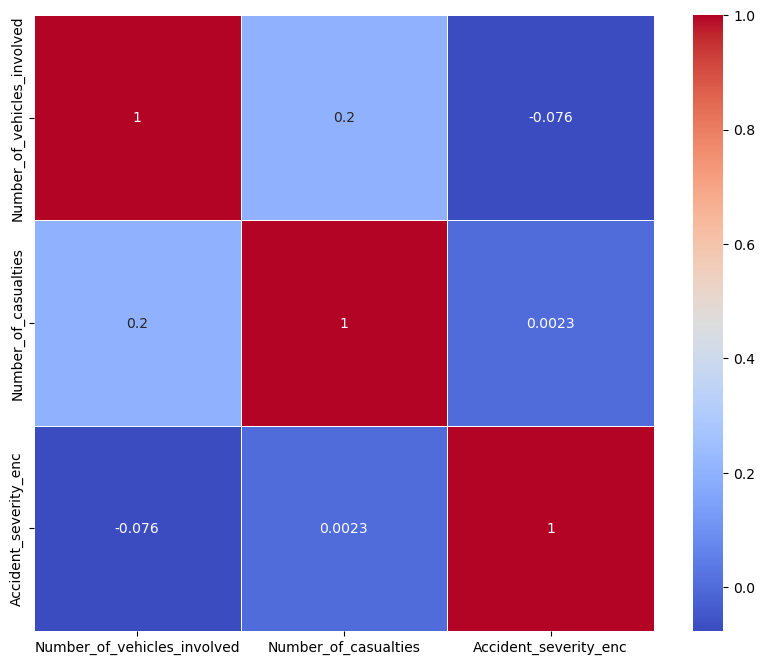

In [41]:
plt.figure(figsize = (10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)

plt.show()

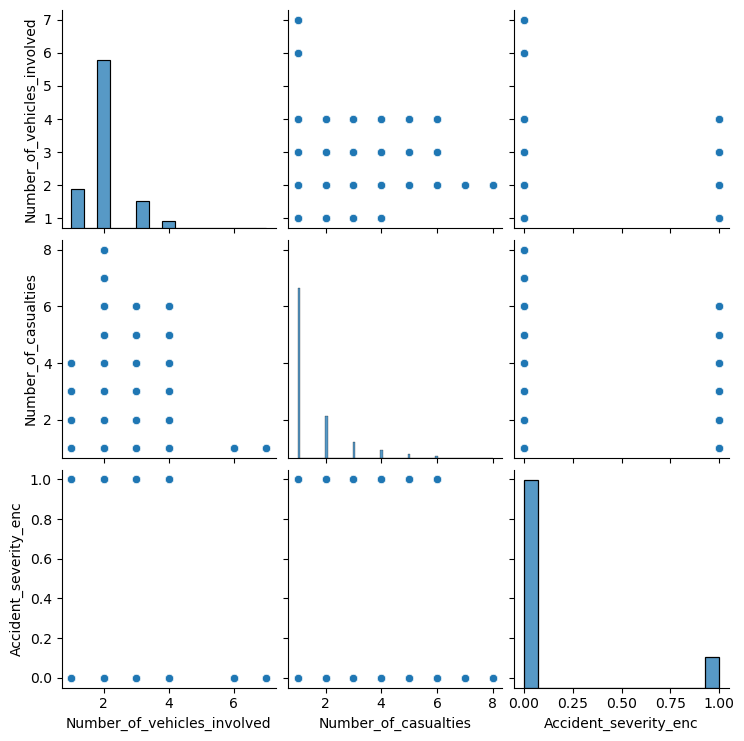

In [44]:
sns.pairplot(cont_var)
plt.show()